# Titanic survival prediction
By Darshik A S

## 1. Setting Environment

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("notebook")

## 2. Data Overview

Variable Definition Key.

* Survival
    0= No
    1= Yes
    
pclass (Ticket class)

1=1st
2=2nd
3=3rd
sex

age

sibsp (# of siblings / spouses aboard the Titanic)
parch (# of parents / children aboard the Titanic)
tickets
fare
cabin
embarked Port of Embarkation.
C = Cherbourg,
Q = Queenstown,
S = Southampton
pclass: A proxy for socio-economic status (SES)
This is important to remember and will come in handy for later analysis.
1st = Upper
2nd = Middle
3rd = Lower

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data.shape

(891, 12)

## 3. Data Preparation

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
data.drop('Cabin',axis=1,inplace=True)

In [22]:
data.dropna(inplace=True)

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
# Checking for duplicates
data.duplicated().sum()

0

In [29]:
data.nunique()

PassengerId    712
Survived         2
Pclass           3
Name           712
Sex              2
Age             88
SibSp            6
Parch            7
Ticket         541
Fare           219
Embarked         3
dtype: int64

In [31]:
# Removing null values
data.drop('PassengerId',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.0,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.0,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.0,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.0,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.0,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.0,512.3292


In [36]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## 4. Exploratory data analysis

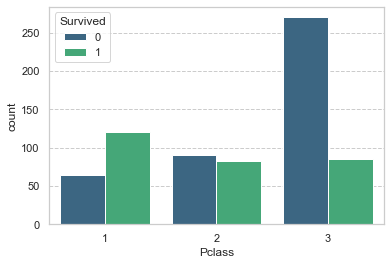

In [35]:
sns.countplot(data=data,x='Pclass',hue='Survived',palette='viridis')
plt.show()

The survival rate of the people is least in the 3rd class and higher in the 1st class

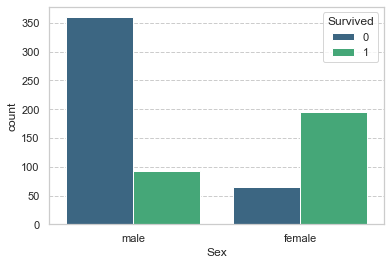

In [37]:
sns.countplot(data=data,x='Sex',hue='Survived',palette='viridis')
plt.show()

The graph shows the number of poeple survived or not survived based on gender. Here it shows that female passengers have survived at a much better rate than male passengers.

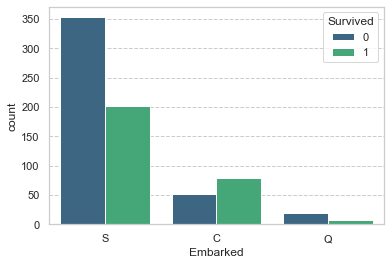

In [40]:
sns.countplot(data=data,x='Embarked',hue='Survived',palette='viridis')
plt.show()

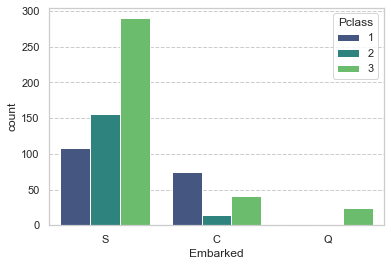

In [45]:
sns.countplot(data=data,x='Embarked',hue='Pclass',palette='viridis')
plt.show()

It seems the rate of survival in Southampton is least as because the majority of the people from Southampton is in the third class category

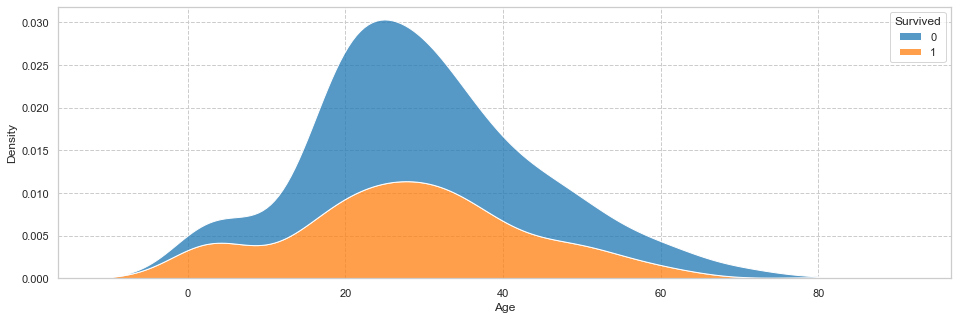

In [76]:
plt.figure(figsize=(16,5))
sns.kdeplot(data=data,x='Age',hue='Survived',multiple='stack')
plt.show()

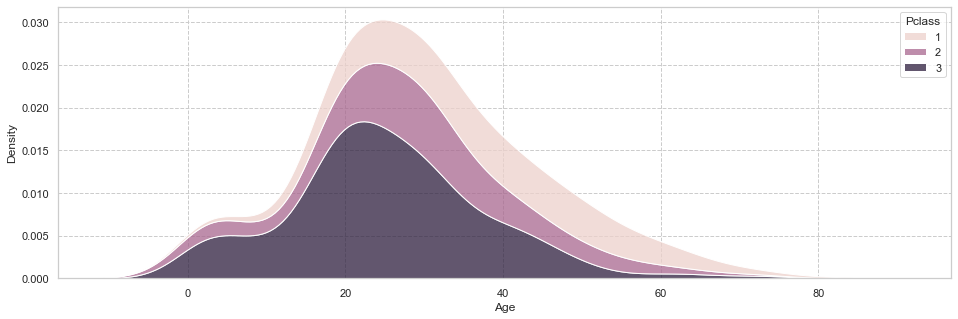

In [73]:
plt.figure(figsize=(16,5))
sns.kdeplot(data=data,x='Age',hue='Pclass',multiple='stack')
plt.show()

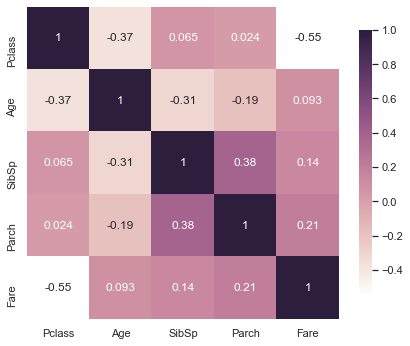

In [63]:
plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(data.iloc[:,1:].corr(),square=True, cmap=cmap, cbar_kws={"shrink": .7},annot=True)
plt.show()

In [89]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 5. Classification

### 5.1 One-Hot-Encoding all the nominal attributes

In [98]:
col_names = ['Pclass','Sex','SibSp','Parch','Embarked']
y = []
for i in col_names:
    y.append(pd.get_dummies(data[i],prefix=i,drop_first=True))

In [99]:
data_res = pd.concat(y,axis=1)

In [101]:
data_new = pd.concat([data_res,data[['Age','Fare']]],axis=1)

In [102]:
data_new.head()

,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S,Age,Fare
0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,22.0,7.2500
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,38.0,71.2833
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26.0,7.9250
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,35.0,53.1000
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,35.0,8.0500


### 5.2 Spliting dataset into train and test data

In [103]:
x = data_new
y = data.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

In [104]:
print(x_train.shape)
print(x_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(569, 18)
(143, 18)
0    336
1    233
Name: Survived, dtype: int64
0    88
1    55
Name: Survived, dtype: int64


### 5.2 Model training and evaluation

In [116]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('GB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))

In [117]:
# Accuracy for each different K folds
folds = {}
names = []

for name, model in models:
    results = []
    print(name)
    for i in range(2,11):
        kfold = StratifiedKFold(n_splits=i,random_state=7)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results.mean())
    print('Max Acc is for fold %s: %0.3f' % (str(results.index(max(results))+2),(max(results))))
    folds[name] = results

LR
Max Acc is for fold 6: 0.803
LDA
Max Acc is for fold 7: 0.803
DT
Max Acc is for fold 10: 0.772
GB
Max Acc is for fold 10: 0.450
SVM
Max Acc is for fold 5: 0.663
KNN
Max Acc is for fold 6: 0.719


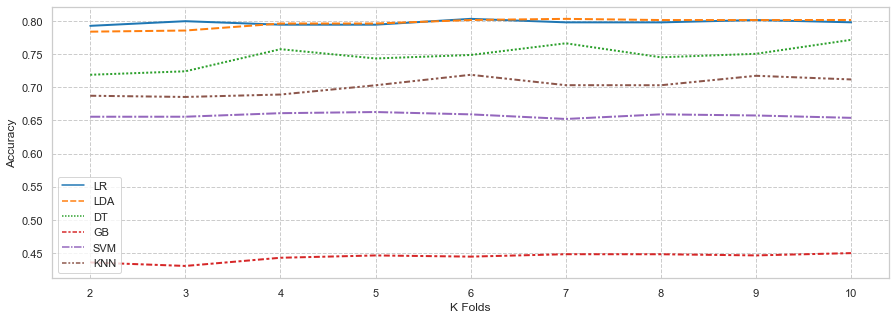

In [118]:
# Plot accuracies for each fold
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=folds,linewidth=2)
ax.set_xticklabels([str(i) for i in range(1,11)])
plt.xlabel('K Folds')
plt.ylabel('Accuracy')
plt.show()

In [110]:
# Creating pipelines for input scaling and ensemble model training
ensemble = []
ensemble.append(('RF', RandomForestClassifier()))
ensemble.append(('AB', AdaBoostClassifier()))
ensemble.append(('GB', GradientBoostingClassifier()))
ensemble.append(('ET', ExtraTreesClassifier()))

In [113]:
# Accuracy for each different K folds
folds = {}
names = []

for name, model in ensemble:
    results = []
    print(name)
    for i in range(2,11):
        kfold = StratifiedKFold(n_splits=i,random_state=7)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results.mean())
    print('Max Acc is for fold %s: %0.3f' % (str(results.index(max(results))+2),(max(results))))
    folds[name] = results

RF
Max Acc is for fold 5: 0.793
AB
Max Acc is for fold 4: 0.801
GB
Max Acc is for fold 6: 0.823
ET
Max Acc is for fold 5: 0.763


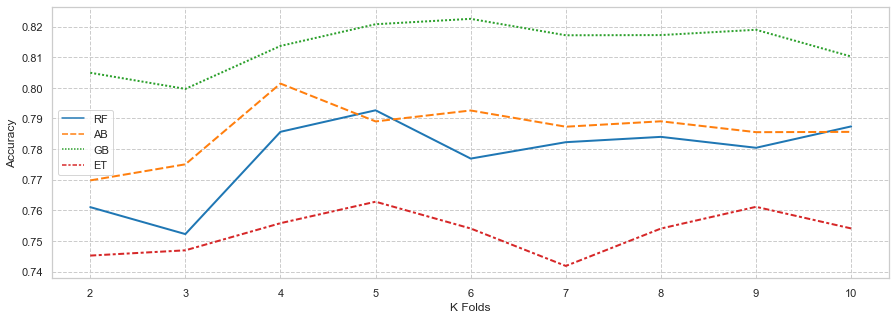

In [115]:
# Plot accuracies for each fold
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=folds,linewidth=2)
ax.set_xticklabels([str(i) for i in range(1,11)])
plt.xlabel('K Folds')
plt.ylabel('Accuracy')
plt.show()

## 6. Prediction

### 6.1 Logistic Regression

In [122]:
%%time
model = LogisticRegression()
model.fit(x_train, y_train)
preditions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  79.72027972027972 

Confusion Matrix : 
 [[77 11]
 [18 37]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.81      0.88      0.84        88
           1       0.77      0.67      0.72        55

    accuracy                           0.80       143
   macro avg       0.79      0.77      0.78       143
weighted avg       0.80      0.80      0.79       143

Wall time: 81.8 ms


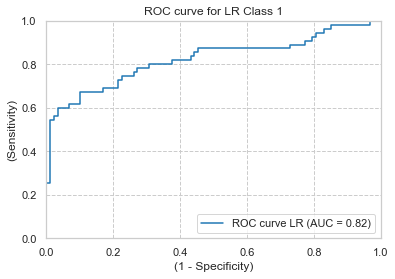

In [124]:
lr_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LR (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LR Class 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 6.2 Linear Discriminant Analysis

In [125]:
%%time
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
preditions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  80.41958041958041 

Confusion Matrix : 
 [[78 10]
 [18 37]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.81      0.89      0.85        88
           1       0.79      0.67      0.73        55

    accuracy                           0.80       143
   macro avg       0.80      0.78      0.79       143
weighted avg       0.80      0.80      0.80       143

Wall time: 23.9 ms


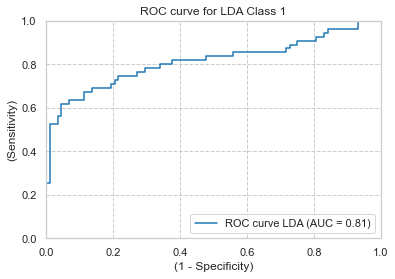

In [126]:
lda_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA Class 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 6.3 Gradient Boosting Classifier

In [127]:
%%time
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
preditions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  83.21678321678321 

Confusion Matrix : 
 [[81  7]
 [17 38]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.83      0.92      0.87        88
           1       0.84      0.69      0.76        55

    accuracy                           0.83       143
   macro avg       0.84      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143

Wall time: 225 ms


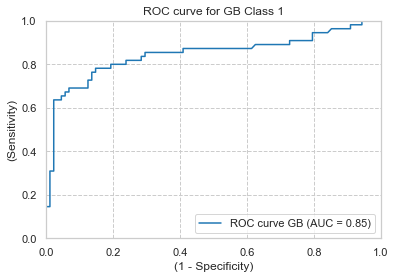

In [128]:
gb_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, gb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve GB (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for GB Class 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()